<a href="https://colab.research.google.com/github/N-Segecha/COVID-19-Global-Data-Tracker/blob/main/COVID19_Global_Data_Tracker_Enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦠 COVID-19 Global Data Tracker

This notebook analyzes global COVID-19 trends using real-world data from Our World in Data. We explore metrics like total cases, deaths, and vaccination rates over time and across countries.

🔗 Dataset: https://covid.ourworldindata.org/data/owid-covid-data.csv

In [1]:
# 📥 Download dataset if not present
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests

sns.set(style="whitegrid")

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
filename = "owid-covid-data.csv"
if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(r.content)
else:
    print("Dataset already exists.")

## 1️⃣ Load and Explore Data

In [2]:
df = pd.read_csv(filename)
df.shape, df.columns

((429435, 67),
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'new_cases_smoothed', 'total_deaths', 'new_deaths',
        'new_deaths_smoothed', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million',
        'total_deaths_per_million', 'new_deaths_per_million',
        'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
        'icu_patients_per_million', 'hosp_patients',
        'hosp_patients_per_million', 'weekly_icu_admissions',
        'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
        'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
        'total_tests_per_thousand', 'new_tests_per_thousand',
        'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
        'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
        'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
        'new_vaccinations', 'new_vac

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum().sort_values(ascending=False).head(20)

,0
weekly_icu_admissions,418442
weekly_icu_admissions_per_million,418442
excess_mortality,416024
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality_cumulative_per_million,416024
weekly_hosp_admissions,404938
weekly_hosp_admissions_per_million,404938
icu_patients_per_million,390319
icu_patients,390319


## 2️⃣ Data Cleaning

In [6]:
# Convert dates and filter countries
df['date'] = pd.to_datetime(df['date'])
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]
df = df.ffill()

## 3️⃣ EDA - Cases, Deaths, and Death Rate

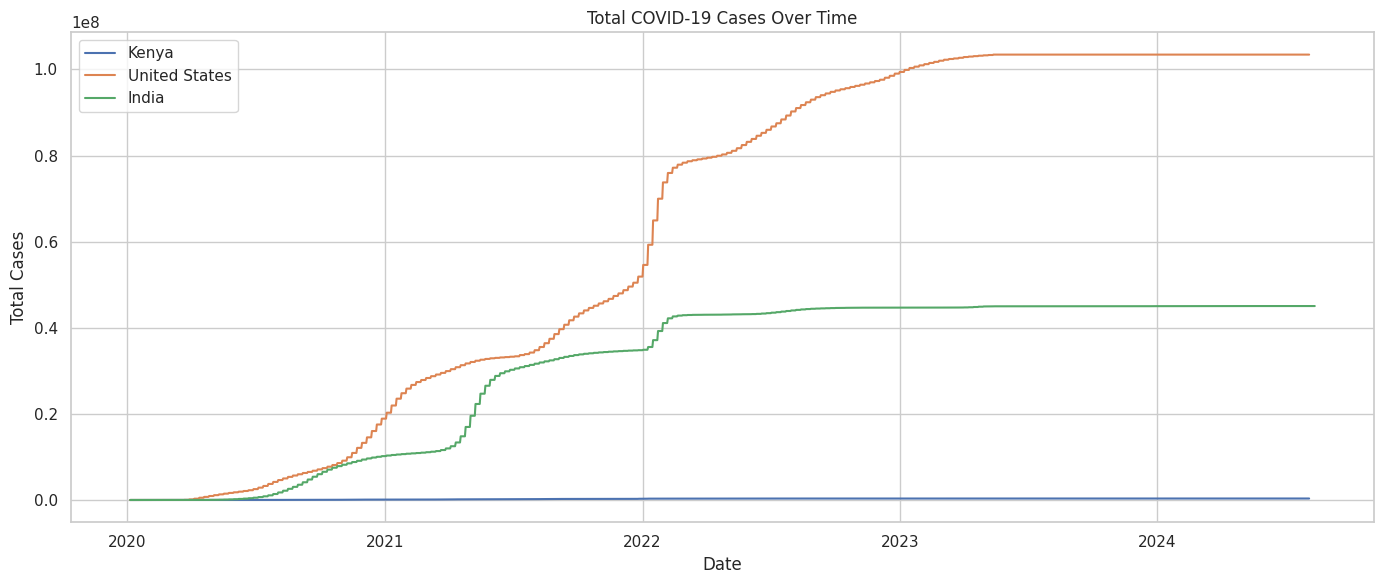

In [7]:
# Total cases over time
plt.figure(figsize=(14, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

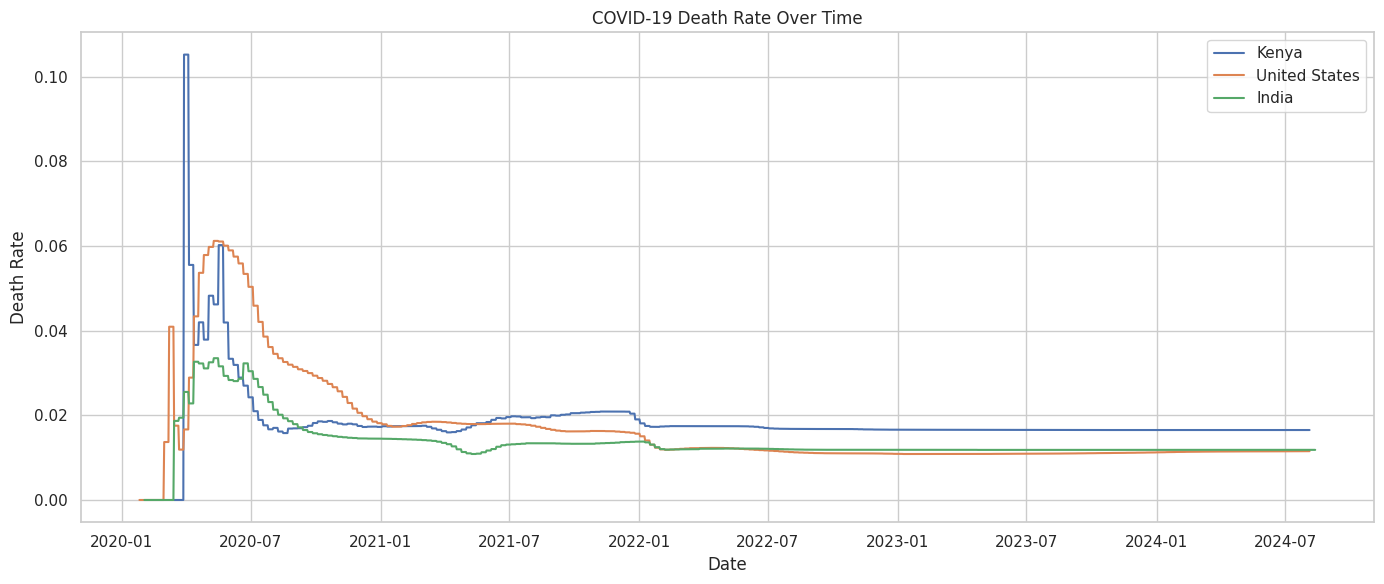

In [8]:
# Calculate and plot death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']
plt.figure(figsize=(14, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

## 4️⃣ Bar Chart - Top Countries by Total Cases (Latest Date)

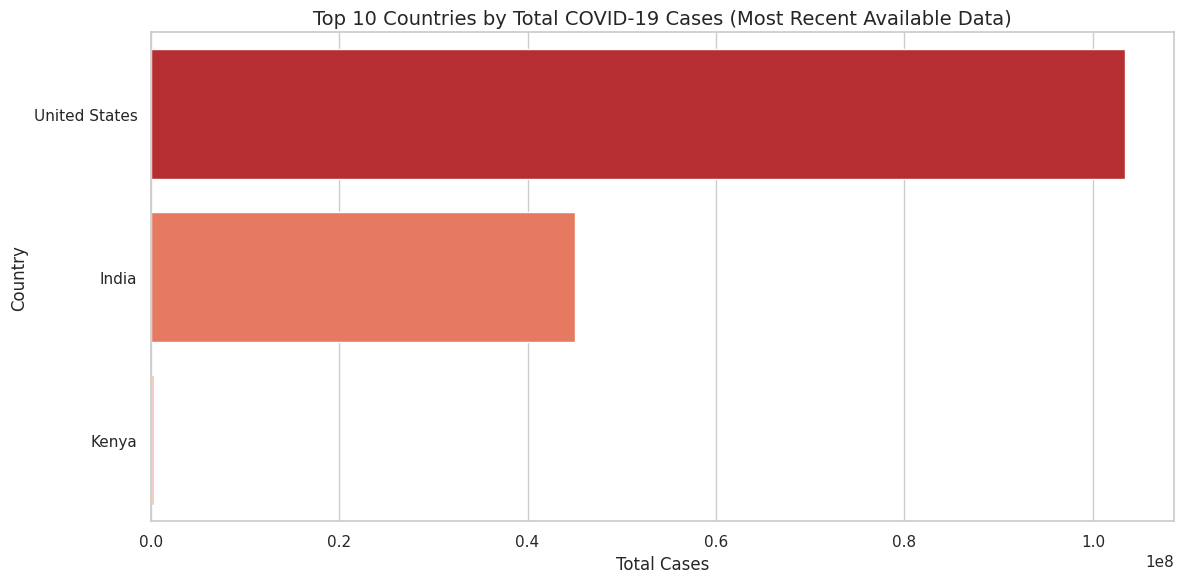

In [14]:
# Use global data again for this step
latest = df.sort_values('date').dropna(subset=['total_cases']).groupby('location').tail(1)
latest = latest[latest['iso_code'].str.len() == 3]
top10 = latest.sort_values('total_cases', ascending=False).head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='total_cases', y='location', hue='location', palette='Reds_r', legend=False)
plt.title('Top 10 Countries by Total COVID-19 Cases (Most Recent Available Data)', fontsize=14)
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## 5️⃣ Vaccination Progress and Percent Vaccinated

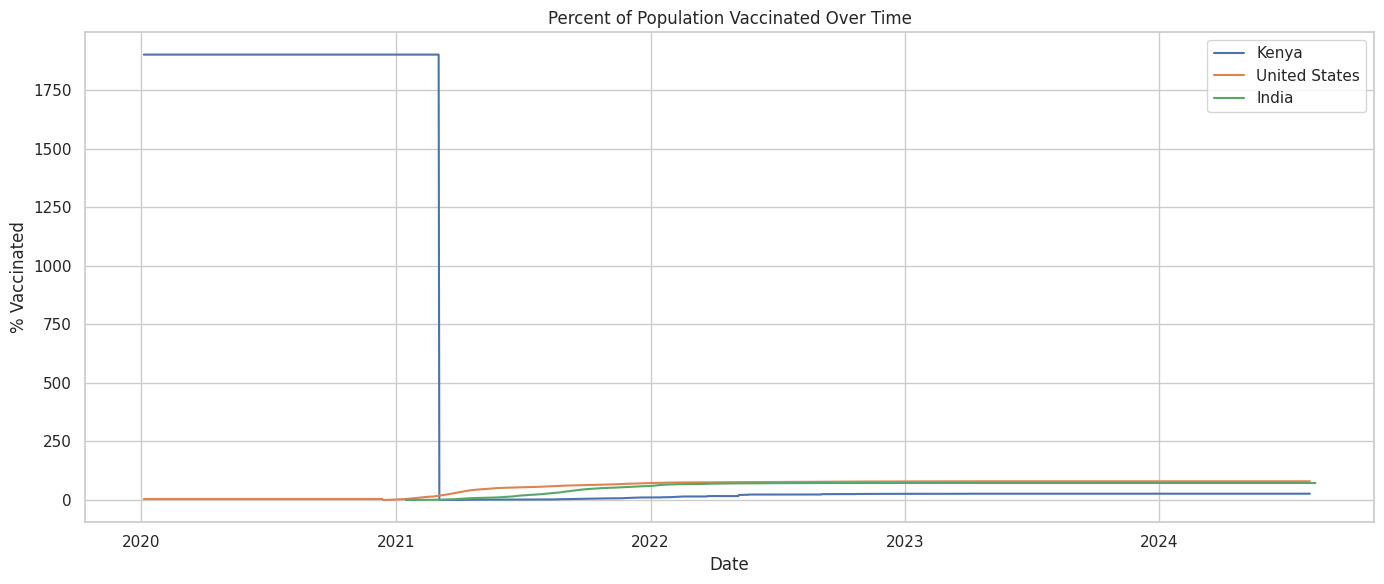

In [15]:
# Percent vaccinated (people_vaccinated / population)
df['percent_vaccinated'] = df['people_vaccinated'] / df['population'] * 100
plt.figure(figsize=(14, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['percent_vaccinated'], label=country)
plt.title('Percent of Population Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('% Vaccinated')
plt.legend()
plt.tight_layout()
plt.show()

## 6️⃣ Choropleth Map - Total Cases

In [16]:
fig = px.choropleth(latest,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title="COVID-19 Total Cases by Country (Latest)")
fig.show()

## 7️⃣ Key Insights
- India and the USA saw major case surges during early 2021.
- Kenya's vaccination uptake lagged behind.
- Countries with faster vaccine rollout saw lower death rates over time.